In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split

2023-02-27 17:59:13.300371: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import tensorflow_datasets as tfds
(training_set, validation_set), dataset_info = tfds.load(
    'tf_flowers',
    split=[
    tfds.Split.TRAIN.subsplit(tfds.percent[:70]),
    tfds.Split.TRAIN.subsplit(tfds.percent[70:])],
    with_info=True,
    as_supervised=True,
)

/Users/lukaginley/opt/anaconda3/envs/EnviromentTest/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-02-27 17:59:16.175488: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
num_training_examples = 0
num_validation_examples = 0
for example in training_set:
    num_training_examples += 1
for example in validation_set:
    num_validation_examples += 1

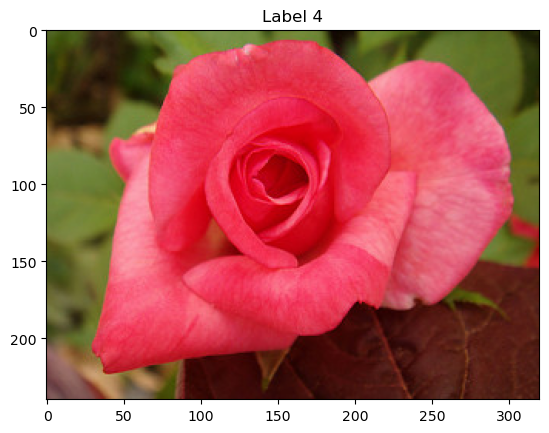

In [4]:
for image, label in training_set.take(1):
    break
image = image.numpy()
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.title('Label {}'.format(label))
plt.grid(False)
plt.show()

In [5]:
IMAGE_RES = 224
def format_image(image, label):
    image =tf.image.resize(image, (IMAGE_RES, IMAGE_RES))/255.0
    return image, label
BATCH_SIZE = 32
train_batches = training_set.shuffle(num_training_examples//4).map(format_image).batch(BATCH_SIZE).prefetch(1)
validation_batches = validation_set.map(format_image).batch(BATCH_SIZE).prefetch(1)

In [6]:
#Convolutional Neural Network

In [7]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(5, activation="softmax"))

model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])
model.fit(train_batches, epochs=30)

Epoch 1/30
81/81 [==============================] - 52s 628ms/step - loss: 1.4003 - accuracy: 0.4108
Epoch 2/30
81/81 [==============================] - 52s 634ms/step - loss: 1.0524 - accuracy: 0.5830
Epoch 3/30
81/81 [==============================] - 53s 654ms/step - loss: 0.8294 - accuracy: 0.6903
Epoch 4/30
81/81 [==============================] - 53s 653ms/step - loss: 0.5306 - accuracy: 0.8066
Epoch 5/30
81/81 [==============================] - 54s 661ms/step - loss: 0.2859 - accuracy: 0.9023
Epoch 6/30
81/81 [==============================] - 54s 666ms/step - loss: 0.1548 - accuracy: 0.9498
Epoch 7/30
81/81 [==============================] - 55s 673ms/step - loss: 0.0964 - accuracy: 0.9683
Epoch 8/30
81/81 [==============================] - 54s 668ms/step - loss: 0.0803 - accuracy: 0.9730
Epoch 9/30
81/81 [==============================] - 55s 671ms/step - loss: 0.0404 - accuracy: 0.9892
Epoch 10/30
81/81 [==============================] - 55s 672ms/step - loss: 0.0367 - accura

In [8]:
#Testing Images

In [9]:
class_names = np.array(dataset_info.features['label'].names)
image_batch, label_batch = next(iter(train_batches))
image_batch = image_batch.numpy()
label_batch = label_batch.numpy()
predicted_batch = model.predict(image_batch)
predicted_batch = tf.squeeze(predicted_batch).numpy()
predicted_ids = np.argmax(predicted_batch, axis=-1)
predicted_class_names = class_names[predicted_ids]
print(predicted_class_names)

1/1 [==============================] - 0s 276ms/step
['dandelion' 'sunflowers' 'dandelion' 'roses' 'roses' 'daisy' 'dandelion'
 'roses' 'dandelion' 'tulips' 'daisy' 'tulips' 'roses' 'sunflowers'
 'daisy' 'dandelion' 'roses' 'roses' 'tulips' 'roses' 'roses' 'roses'
 'sunflowers' 'roses' 'daisy' 'sunflowers' 'roses' 'tulips' 'roses'
 'daisy' 'roses' 'sunflowers']


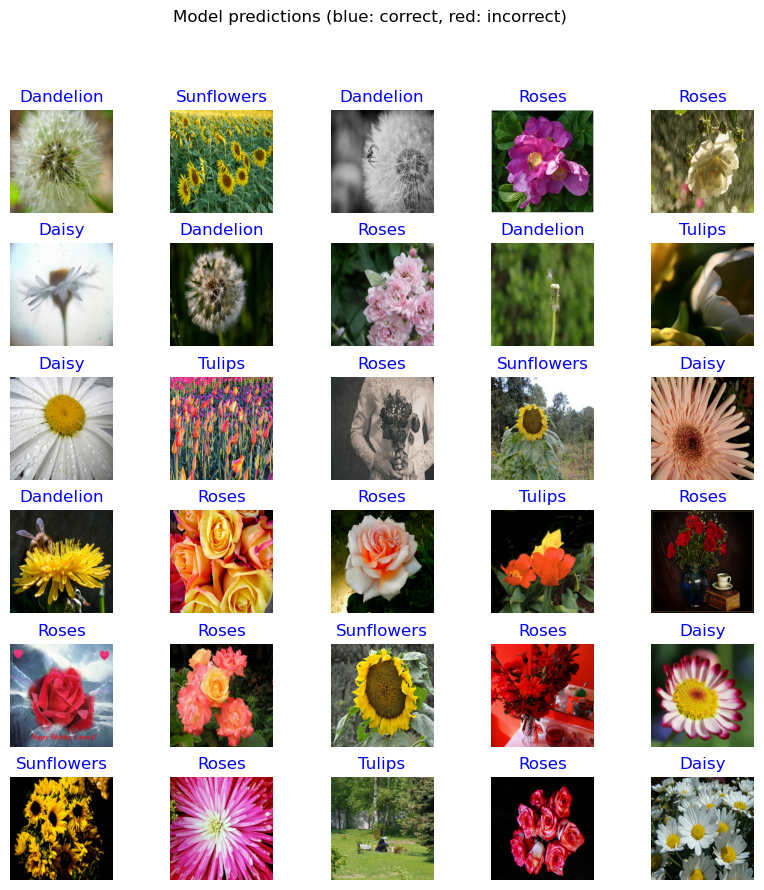

In [10]:
plt.figure(figsize=(10, 10))
for n in range(30):
    plt.subplot(6,5,n+1)
    plt.subplots_adjust(hspace = 0.3)
    plt.imshow(image_batch[n])
    color = "blue" if predicted_ids[n] == label_batch[n] else "red"
    plt.title(predicted_class_names[n].title(), color=color)
    plt.axis('off')
_ = plt.suptitle("Model predictions (blue: correct, red: incorrect)")

In [11]:
#Save Model

In [12]:
model.save_weights("FlowerModel.h5")